In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Fraud_detect.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
df.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

The dataset contains 1000 rows and 40 columns.

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='Density'>

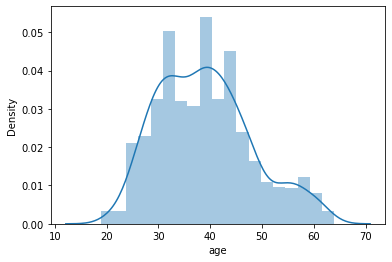

In [13]:
sns.distplot(df['age'],kde= True)

The age distribution can be seen from the above plot, where the max age is over 60 years and the minimum is below 20.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

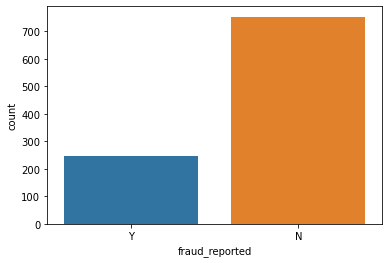

In [17]:
sns.countplot(df['fraud_reported'])

In [18]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The reported fraud count in claim is less in comparision to the number of times fraud did not happen.

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

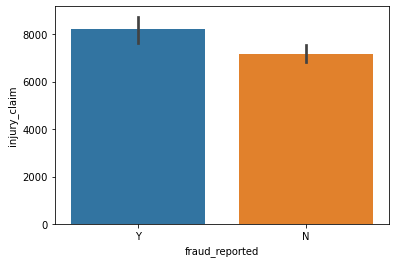

In [19]:
sns.barplot(data=df, x='fraud_reported' , y= 'injury_claim')

It can be seen that there is high number of fraud reported during injury claim.

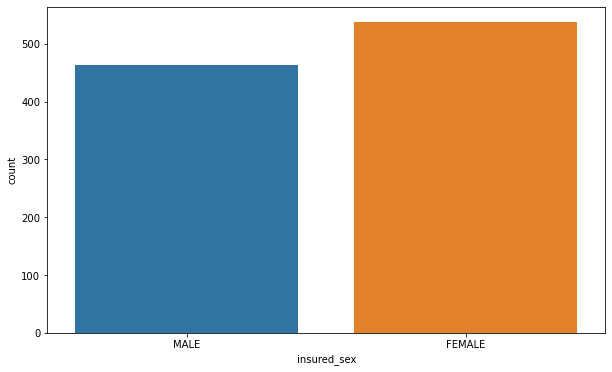

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_sex', data=df) 
plt.show()

In [20]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

The female count is slightly more than the male count there is not a high imbalance.

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

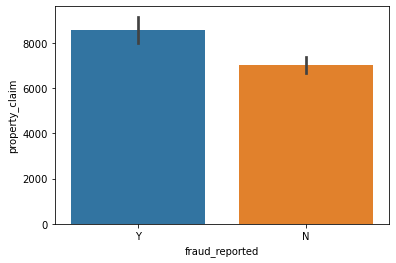

In [20]:
sns.barplot(data=df, x='fraud_reported' , y= 'property_claim')

high fraud report during property claim

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

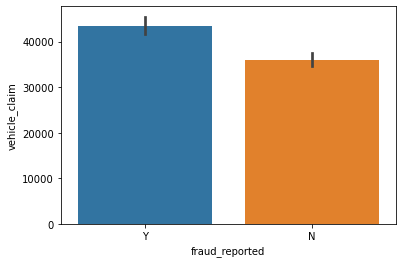

In [21]:
sns.barplot(data=df, x='fraud_reported' , y= 'vehicle_claim')

High fraud report during property claim and vechicle claim

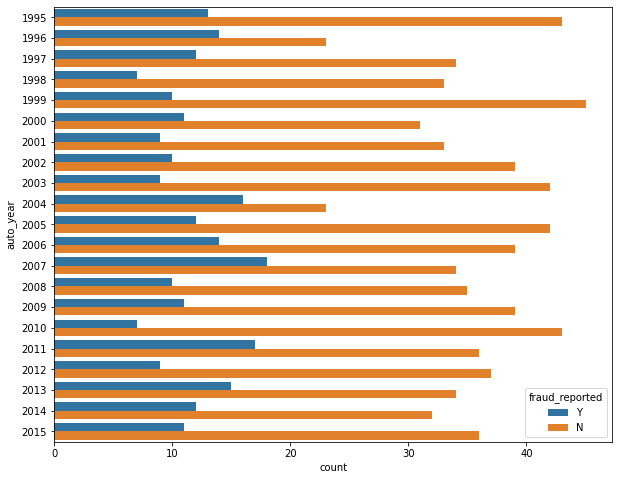

In [15]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data=df, hue='fraud_reported' , y= 'auto_year')
plt.show()

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

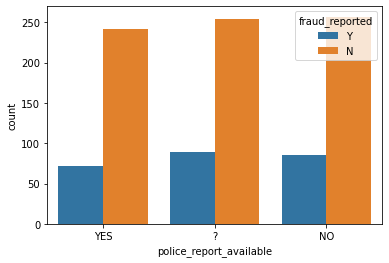

In [46]:
sns.countplot(data=df, hue='fraud_reported' , x= 'police_report_available')

it can be seen that for all the reportd cases police report was not available

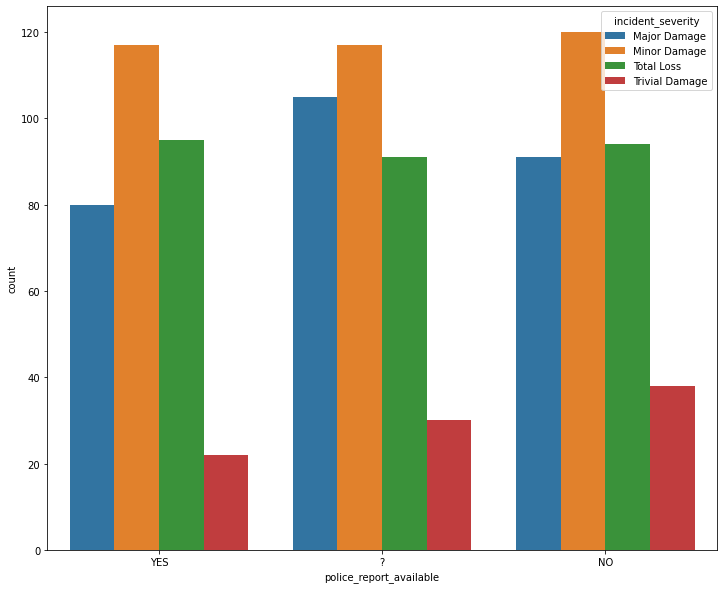

In [49]:
fig = plt.figure(figsize=(12,10))
sns.countplot(data=df, hue='incident_severity' , x= 'police_report_available')
plt.show()

Even for major damages the police report is lacking. 

<AxesSubplot:xlabel='witnesses', ylabel='count'>

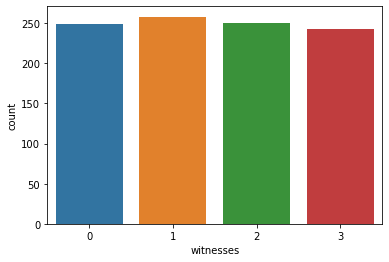

In [53]:
sns.countplot(data=df , x= 'witnesses')

In [52]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot:xlabel='witnesses', ylabel='count'>

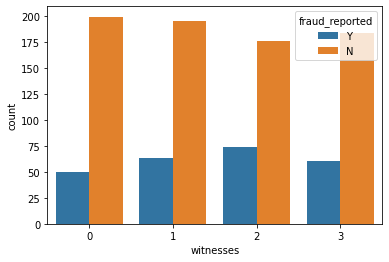

In [54]:
sns.countplot(data=df, hue='fraud_reported' , x= 'witnesses')

The number of witnesses being same it can be seen that there are cases that there are claims reported fraud  and have a witness 

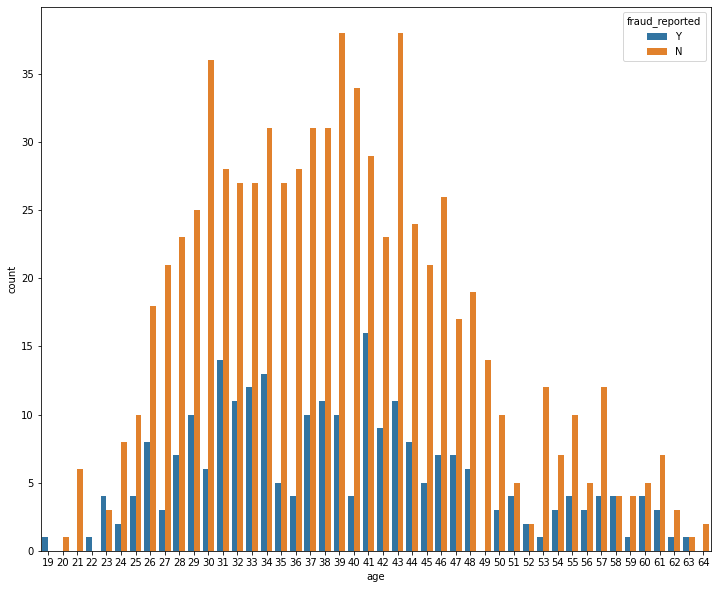

In [16]:
fig = plt.figure(figsize=(12,10))
sns.countplot(data=df, hue='fraud_reported' , x= 'age')
plt.show()

With higher age the fraud report on the claims reduce, but from the age of 23 to 48  the number of fraud report is high , also it is seen that for age lower than 19 there is fraud report on the claim.

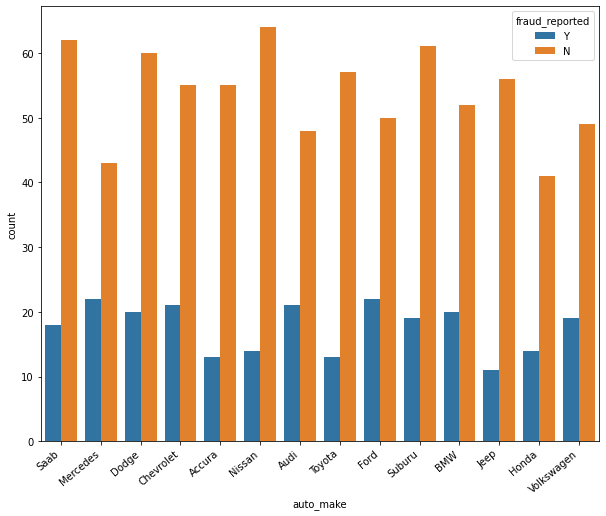

In [45]:
fig = plt.figure(figsize=(10,8))
ax=sns.countplot(data=df, hue='fraud_reported' , x= 'auto_make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Although for all the models each have reported fraud insurence, Nissan has the higest number of non- fraud reported on its claim.

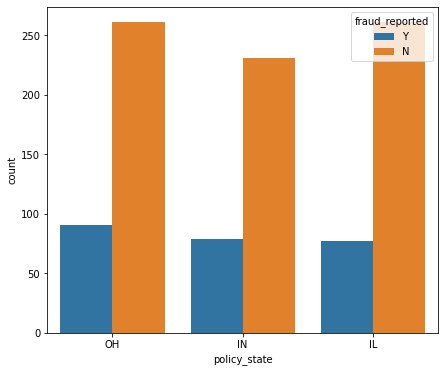

In [10]:
fig = plt.figure(figsize=(7,6))
sns.countplot(data=df, hue='fraud_reported' , x= 'policy_state')
plt.show()

    It can be seen that in each of the state inurence fraud has occured. 

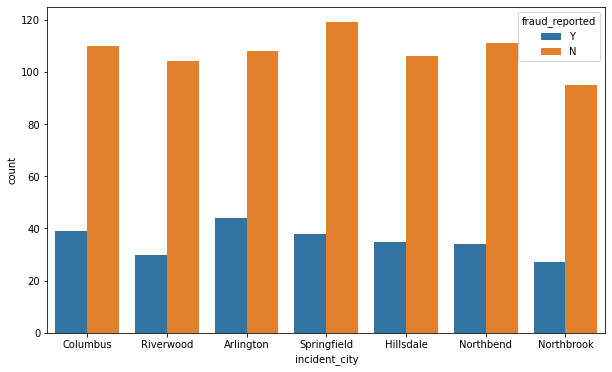

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'incident_city', hue= 'fraud_reported', data=df) 
plt.show()

of the all the cities Alington has the mot fraud reported on its claims.

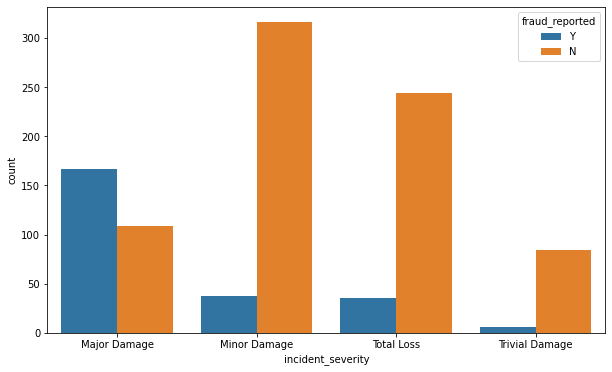

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'incident_severity', hue= 'fraud_reported', data=df) 
plt.show()

IN CASE OF MAJOR DAMAGES THE NUMBER OF FRAUD REPORT IS HIGHER.

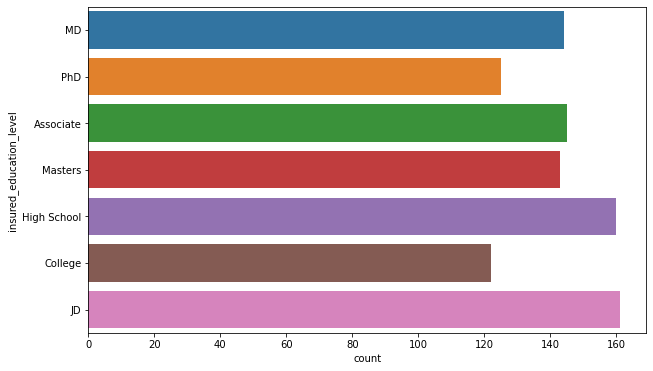

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y = 'insured_education_level', data=df) 
plt.show()

In [55]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

The JD is the hihgest insured education level followed by high school.

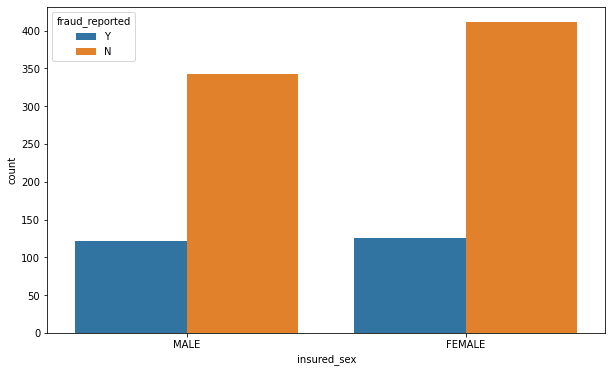

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_sex', hue= 'fraud_reported', data=df) 
plt.show()

Using a scatter plot I will check the relation between :
- the capital gains / losses and the fraud reported and see if the fraud report affects it or not
- the capital gains / losses and the total_claim_amount and see if the fraud report affects it or not

<AxesSubplot:xlabel='capital-gains', ylabel='capital-loss'>

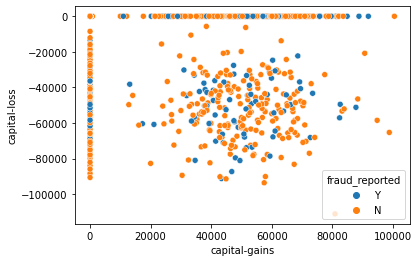

In [26]:
sns.scatterplot(x='capital-gains', y ='capital-loss', hue='fraud_reported',data=df)

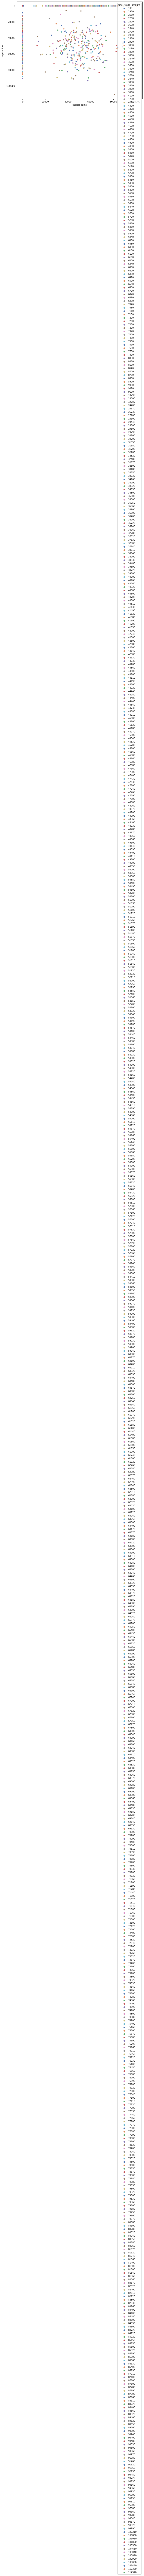

In [41]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='capital-gains', y ='capital-loss', hue='total_claim_amount',palette="deep",data=df)
plt.show()

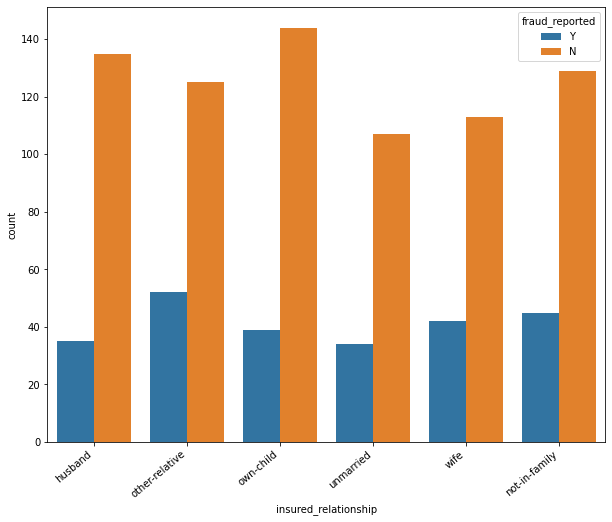

In [43]:
fig = plt.figure(figsize=(10,8))
ax= sns.countplot(x = 'insured_relationship', hue= 'fraud_reported', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

for all the relations it can be seen that there is a fraud report the highest are for the claim of other relative.  

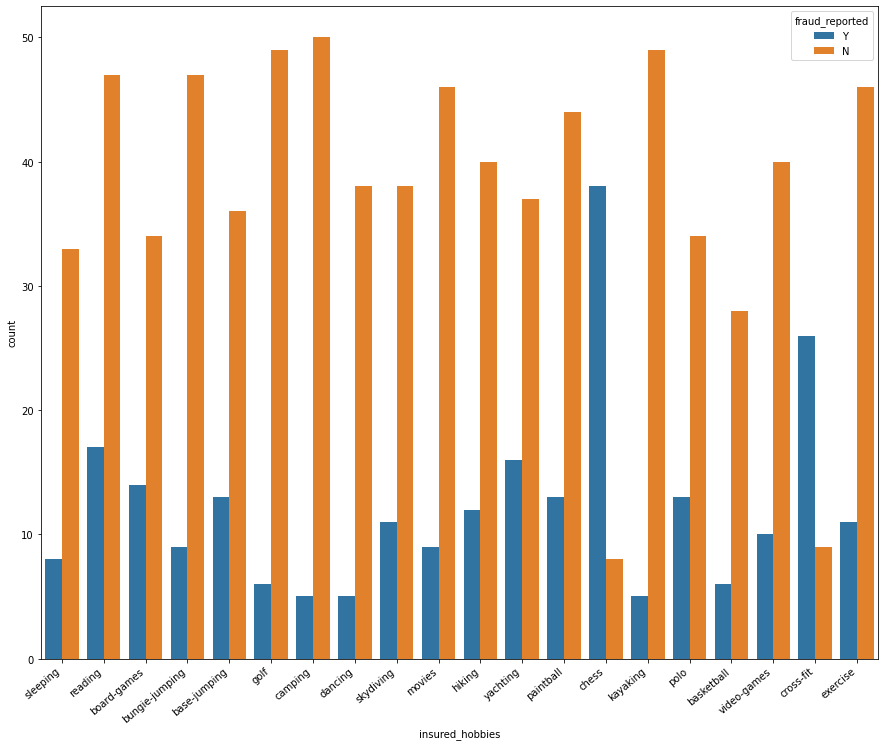

In [35]:
fig = plt.figure(figsize=(15,12))
ax= sns.countplot(x = 'insured_hobbies', hue= 'fraud_reported', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Among all the insured hobby chess has the highest fraud report, followed by cross-fit.  

In [35]:
df['policy_annual_premium'].value_counts()

1215.36    2
1374.22    2
1389.13    2
1281.25    2
1074.07    2
          ..
1185.44    1
1243.84    1
1270.02    1
1023.11    1
1337.56    1
Name: policy_annual_premium, Length: 991, dtype: int64

In [14]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


- The std shows highly spreaded data.
- Th count column is sameexpect for '_c39 '

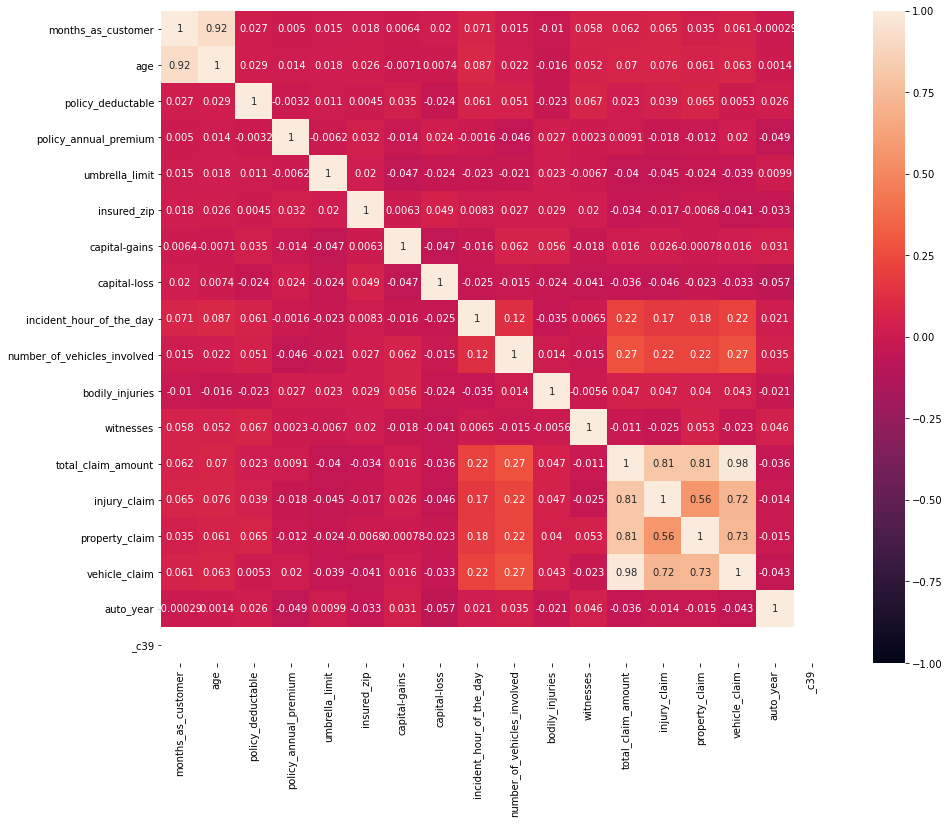

In [10]:
plt.figure(figsize=[15,12])
sns.heatmap(df.corr(), annot=True,vmin=-1 , vmax=1)
plt.show()

It can be seen that -
- features like 'Vechicle_claim', 'property_claim','Injury_claim' and 'total_claim_amount' are all highly coorelated with each other. 
- columns like 'incient_hour_of_the_day'and 'number of vechilcle_involved' are coorrlated but with a lesser value. 

<AxesSubplot:>

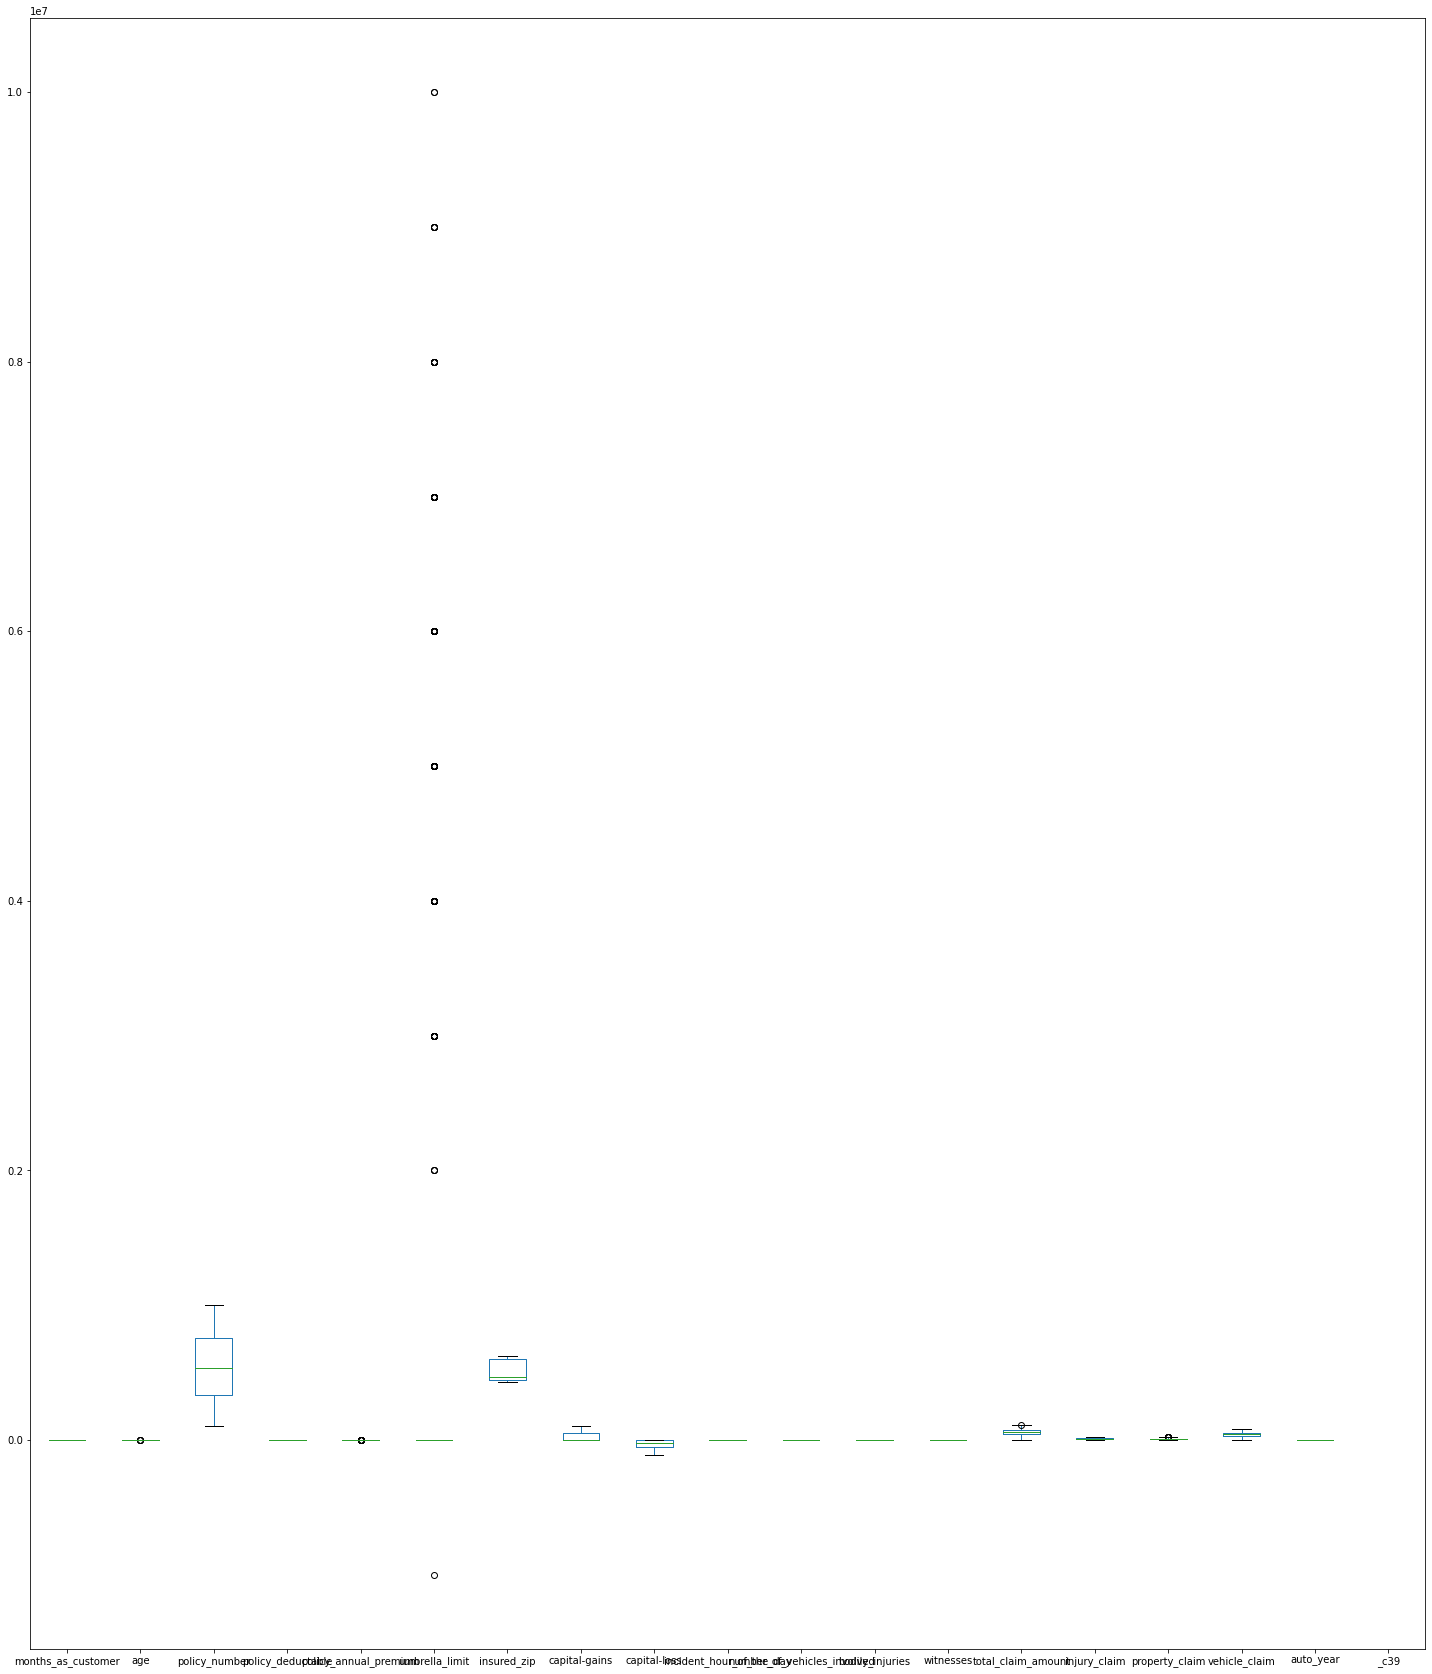

In [5]:
df.plot(kind='box', figsize=(25,30))

Presence of outliers detected

In [56]:
df.drop(['_c39'], axis=1, inplace=True)

In [57]:
from sklearn.preprocessing import OrdinalEncoder          #The encoder helps to convert categorical columns having an object dtype  to float values

enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head(30)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
5,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,2,1.0,64100,6410,6410,51280,10.0,3.0,2003,1.0
6,137,34,413978,112.0,1.0,1.0,1000,1333.35,0,441716,...,0,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0
7,165,37,429027,60.0,0.0,0.0,1000,1137.03,0,603195,...,2,2.0,51590,9380,9380,32830,1.0,5.0,2015,0.0
8,27,33,485665,132.0,0.0,0.0,500,1442.99,0,601734,...,1,2.0,27700,2770,2770,22160,12.0,9.0,2012,0.0
9,212,42,636550,772.0,0.0,0.0,500,1315.68,0,600983,...,1,0.0,42300,4700,4700,32900,10.0,1.0,1996,0.0


In [58]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [59]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt.fit(df)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


#### Features Selection

In [60]:
df.drop(['policy_number'],axis=1, inplace=True)

In [61]:
df.drop(['policy_bind_date'],axis=1, inplace=True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

#### Scalling the dataset

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
print(scaler.fit(x_train,y_train))

StandardScaler()


In [66]:
from imblearn.over_sampling import SMOTE
SM=SMOTE(k_neighbors=2)
x,y= SM.fit_resample(x,y)
# TO BALANCE THE DATASET FORM IMBALANCED VARIABLES.

In [67]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report,f1_score

In [68]:
models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),LogisticRegression(C=5,max_iter=10000, tol=0.1),GaussianNB(),RandomForestClassifier(n_estimators=100,max_features='auto')]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m,':')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("Test F1 Score: ",f1_score(y_test,y_pred))
    pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    


accuracy score of KNeighborsClassifier() :
0.7066666666666667
[[205  15]
 [ 73   7]]
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       220
         1.0       0.32      0.09      0.14        80

    accuracy                           0.71       300
   macro avg       0.53      0.51      0.48       300
weighted avg       0.63      0.71      0.64       300

Test F1 Score:  0.13725490196078433
accuracy score of DecisionTreeClassifier() :
0.7933333333333333
[[191  29]
 [ 33  47]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       220
         1.0       0.62      0.59      0.60        80

    accuracy                           0.79       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.79      0.79      0.79       300

Test F1 Score:  0.6025641025641025
accuracy score of LogisticRegression(C=5, max_iter=10000, tol=0.1) :
0.73
[[219   1]
 [ 80   0]]
      

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
gb_pred=gb.predict(x_test)
gb.score(x_train,y_train)
print(gb.score(x_test,y_test))
print(gb_pred)
print('accuracy score of',GradientBoostingClassifier,':')
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Test F1 Score: ",f1_score(y_test,gb_pred))
pd.crosstab(y_test, gb_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.77
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
accuracy score of <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> :
0.7

Predicted,0.0,1.0,All
True,,,
0.0,192,28,220
1.0,41,39,80
All,233,67,300


In [70]:
from sklearn.ensemble import AdaBoostClassifier
adf = AdaBoostClassifier(n_estimators=100, random_state=0)
adf.fit(x_train, y_train)
adf_pred=adf.predict(x_test)
print(adf_pred)
print(adf.score(x, y))
print('accuracy score of',AdaBoostClassifier,':')
print(accuracy_score(y_test,adf_pred))
print(confusion_matrix(y_test,adf_pred))
print(classification_report(y_test,adf_pred))
print("Test F1 Score: ",f1_score(y_test,adf_pred))
pd.crosstab(y_test, adf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
0.7423638778220452
accuracy score of <class 'sklearn.ensemble._weight_boosting.AdaBoos

Predicted,0.0,1.0,All
True,,,
0.0,193,27,220
1.0,49,31,80
All,242,58,300


In [71]:
!pip install xgboost

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(xgb.score(x, y))
print(xgb_pred)
print('accuracy score of',XGBClassifier,':')
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
print("Test F1 Score: ",f1_score(y_test,xgb_pred))
pd.crosstab(y_test, xgb_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[03:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.852589641434263
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1.

Predicted,0.0,1.0,All
True,,,
0.0,191,29,220
1.0,33,47,80
All,224,76,300


In [73]:
from sklearn.model_selection import cross_val_score
mod1=[KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(n_estimators=100, random_state=0),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),XGBClassifier(n_estimators=100)]
for i in mod1:
    scores= cross_val_score(i,x,y,cv=5)
    print(scores,i)
    print(scores.mean(), scores.std(),i)

[0.64569536 0.65116279 0.70431894 0.71760797 0.72425249] KNeighborsClassifier()
0.6886075113858883 0.033472376045583556 KNeighborsClassifier()
[0.75165563 0.80398671 0.89700997 0.86710963 0.85714286] DecisionTreeClassifier()
0.8353809597148578 0.05152466076115627 DecisionTreeClassifier()
[0.59933775 0.55813953 0.53488372 0.59468439 0.59800664] LogisticRegression()
0.5770104068117312 0.026009571956996835 LogisticRegression()
[0.61258278 0.57807309 0.55813953 0.60465116 0.6013289 ] GaussianNB()
0.5909550944973707 0.02002878951248041 GaussianNB()
[0.68874172 0.82392027 0.91362126 0.94352159 0.95016611] RandomForestClassifier()
0.8639941915469407 0.09852147148332348 RandomForestClassifier()
[0.65231788 0.77740864 0.910299   0.92026578 0.93355482] AdaBoostClassifier(n_estimators=100, random_state=0)
0.8387692239994721 0.1088776668507689 AdaBoostClassifier(n_estimators=100, random_state=0)
[0.65231788 0.77076412 0.92026578 0.93355482 0.94019934] GradientBoostingClassifier(learning_rate=1.0, 

- of all the classifiers Xgboost has the highest cros val score- 87.25% foloowed by RandomForest - 86.39%

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
false_positive_rate , true_positive_rate ,threshold = roc_curve(y_test,xgb_pred)
roc_auc= auc(false_positive_rate , true_positive_rate)
tpr=true_positive_rate
fpr=false_positive_rate
print(tpr,fpr,threshold)

[0.     0.5875 1.    ] [0.         0.13181818 1.        ] [2. 1. 0.]


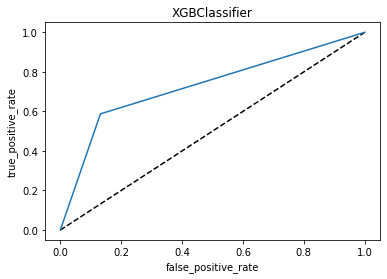

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('XGBClassifier')
plt.show()

In [76]:
auc_score=roc_auc_score(y_test,xgb_pred)
print('xgb:', auc_score)

xgb: 0.727840909090909


In [ ]:
false_positive_rate , true_positive_rate ,threshold = roc_curve(y_test,xgb_pred)
roc_auc= auc(false_positive_rate , true_positive_rate)
tpr=true_positive_rate
fpr=false_positive_rate
print(tpr,fpr,threshold)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('XGBClassifier')
plt.show()
auc_score=roc_auc_score(y_test,xgb_pred)
print('xgb:', auc_score)

In [77]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}
xgb= XGBClassifier()
xgb = GridSearchCV(xgb, params, cv=5)
xgb.fit(x_train,y_train)
xgb.best_params_   

[03:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'colsample_bytree': 0.9,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.9}

In [86]:
from sklearn.model_selection import GridSearchCV
params= { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf=RandomForestClassifier()
rf = GridSearchCV(rf, params, cv=5)
rf.fit(x_train,y_train)
rf.best_params_   

{'max_features': 'sqrt', 'n_estimators': 200}

In [88]:
rf=RandomForestClassifier(n_estimators=200,max_features='sqrt')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)
print('accuracy score of',rf,':')
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Test F1 Score: ",f1_score(y_test,rf_pred))
pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

accuracy score of RandomForestClassifier(max_features='sqrt', n_estimators=200) :
0.7566666666666667
[[204  16]
 [ 57  23]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       220
         1.0       0.59      0.29      0.39        80

    accuracy                           0.76       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.73      0.76      0.73       300

Test F1 Score:  0.38655462184873945


Predicted,0.0,1.0,All
True,,,
0.0,204,16,220
1.0,57,23,80
All,261,39,300


In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree= 0.9,max_depth= 6,n_estimators= 100,subsample= 0.9)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(xgb.score(x, y))
print(xgb_pred)
print('accuracy score of',XGBClassifier,':')
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
pd.crosstab(y_test, xgb_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[04:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8472775564409031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0

Predicted,0.0,1.0,All
True,,,
0.0,192,28,220
1.0,37,43,80
All,229,71,300


[0.     0.5375 1.    ] [0.         0.12727273 1.        ] [2. 1. 0.]


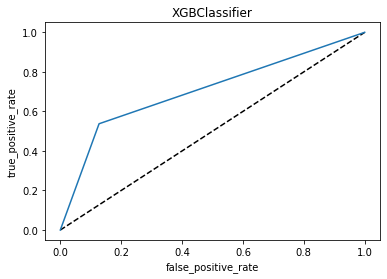

xgb: 0.7051136363636364


In [84]:
false_positive_rate , true_positive_rate ,threshold = roc_curve(y_test,xgb_pred)
roc_auc= auc(false_positive_rate , true_positive_rate)
tpr=true_positive_rate
fpr=false_positive_rate
print(tpr,fpr,threshold)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('XGBClassifier')
plt.show()
auc_score=roc_auc_score(y_test,xgb_pred)
print('xgb:', auc_score)

- XGBoost clasifier scores the best in accuracy- 78.3% , Auc-score- 70.5% 



In [89]:
#model prediction using xgb
x_predict = list(xgb.predict(x_test))
df_new = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(df_new))

     predicted_values  orignal_values
521               0.0             0.0
737               0.0             0.0
740               0.0             0.0
660               0.0             0.0
411               0.0             0.0
..                ...             ...
468               0.0             0.0
935               0.0             1.0
428               1.0             1.0
7                 0.0             0.0
155               1.0             1.0

[300 rows x 2 columns]


<AxesSubplot:xlabel='orignal_values', ylabel='predicted_values'>

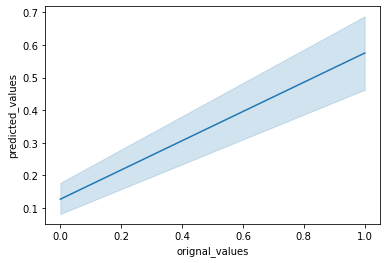

In [81]:
sns.lineplot(y='predicted_values', x='orignal_values', data=df_new )

##### Saving the model

In [82]:
import joblib
joblib.dump(xgb,'xgb_file.obj')

['xgb_file.obj']

### Final thoughts and findings on the dataset

Insurence sector has affected most lives as it offers something unique that everyone needs one way or another as one receives financial protection or reimbursement against losses from the insurence company.
So there are a lot of risks involved fo the copany as it pays money to its client so there are times that the claims can be fradulent so the companie must be very careful whle reembursing its clients and hence it will need data where in they can indentify factors responsible for understanding a fraudulent claim over a genuine claim. So thiurg this dataset it can be pedicted based ona number of factors wheather the claims are worthwhile or not.
So the dataset provided consists of categorical column that show where the claims were fraud and where the claims were geneiune. 
The dataset can be best predicted with the help of xgboot classifier as it had the highest accuracy score, Cros val and F1 score.
It was interesting to observe that there were fraudulent claims in all the spheres of the insurence[ insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','Age','Incident_loctaion']. With the highest claims being for Major damage crossing over 150 counts. 
So for all companies the processing of any and all claims should be checked properly.
It will be interesting to observe what steps the compnies can come up with to stop such fradulent claims. As this sphere of work can be used in various other fields like banking , finance.                                                                                                    
                                                                                                    